<a href="https://colab.research.google.com/github/Arpan-000/Sentiment-Analysis/blob/main/Sentiment_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import nltk

from nltk.corpus import movie_reviews
from nltk import FreqDist, NaiveBayesClassifier
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [32]:
nltk.download("movie_reviews")
nltk.download('stopwords')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [45]:

for i, (words, sentiment) in enumerate(all_reviews[:10]):
    print(f"Review {i + 1}: {' '.join(words)}")
    print(f"Sentiment: {sentiment}\n")


Review 1: films adapted from comic books have had plenty of success , whether they ' re about superheroes ( batman , superman , spawn ) , or geared toward kids ( casper ) or the arthouse crowd ( ghost world ) , but there ' s never really been a comic book like from hell before . for starters , it was created by alan moore ( and eddie campbell ) , who brought the medium to a whole new level in the mid ' 80s with a 12 - part series called the watchmen . to say moore and campbell thoroughly researched the subject of jack the ripper would be like saying michael jackson is starting to look a little odd . the book ( or " graphic novel , " if you will ) is over 500 pages long and includes nearly 30 more that consist of nothing but footnotes . in other words , don ' t dismiss this film because of its source . if you can get past the whole comic book thing , you might find another stumbling block in from hell ' s directors , albert and allen hughes . getting the hughes brothers to direct this s

In [33]:
positive_reviews = [(movie_reviews.words(file_id), "positive") for file_id in movie_reviews.fileids("pos")]
negative_reviews = [(movie_reviews.words(file_id), "negative") for file_id in movie_reviews.fileids("neg")]


In [34]:
all_reviews = positive_reviews + negative_reviews

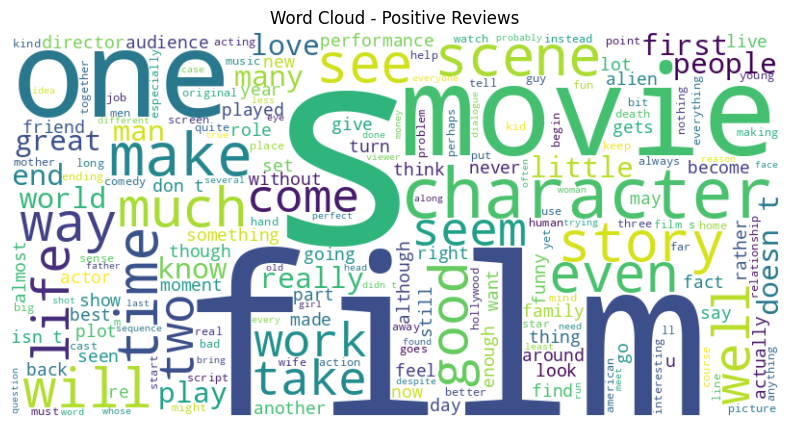

In [35]:
positive_words = [word.lower() for words, sentiment in positive_reviews for word in words]
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_words))
plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Positive Reviews')
plt.show()


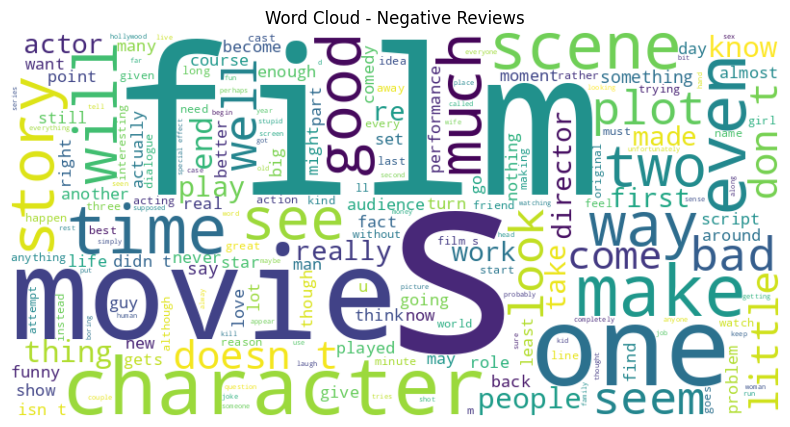

In [36]:
negative_words = [word.lower() for words, sentiment in negative_reviews for word in words]
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(negative_words))
plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Negative Reviews')
plt.show()

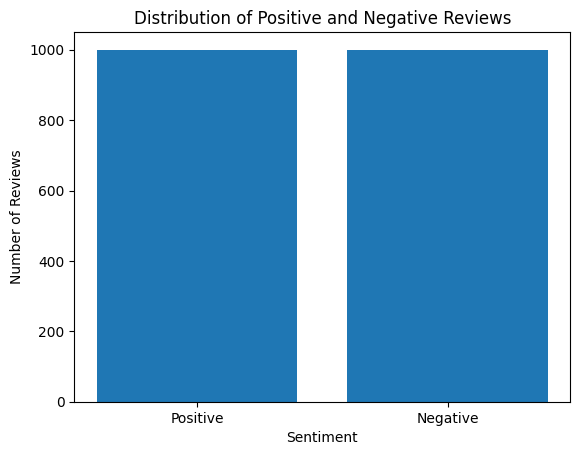

In [37]:
sentiments = [sentiment for _, sentiment in all_reviews]
plt.bar(['Positive', 'Negative'], [sentiments.count('positive'), sentiments.count('negative')])
plt.title('Distribution of Positive and Negative Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

In [38]:
train_set, test_set = train_test_split(all_reviews, test_size=0.2, random_state=42)

In [39]:
def extract_features(words):
    stop_words = set(stopwords.words("english"))
    return {word: True for word in words if word.lower() not in stop_words}

In [40]:
train_features = [(extract_features(words), sentiment) for words, sentiment in train_set]

In [41]:
classifier = NaiveBayesClassifier.train(train_features)

In [42]:
test_features = [(extract_features(words), sentiment) for words, sentiment in test_set]

In [43]:
predictions = [classifier.classify(features) for features, _ in test_features]

In [44]:
accuracy = accuracy_score([sentiment for _, sentiment in test_set], predictions)
print("Accuracy:", accuracy)


Accuracy: 0.6925
